# Numerical results of "Large deviations of extremal eigenvalues of generalized sample covariance matrices"

We present the code used to generate Figures 1,2 and 3 of the paper. 
This notebook uses data that was generated by the following script files:
- The functions $G_\sigma$ and $\overline{G}_\sigma$ are computed from the file "analytical_G_Gbar.py"
- The analytical rate functions of Fig.2 are computed from the results of the script "analytical_rate_function.py"
- The MC results of Fig.3 are generated with the scripts "run_rho.py", with rho the distribution of the $\{d_\mu\}_{\mu=1}^m$.

Antoine Maillard

In [1]:
%matplotlib inline
import numpy as np, matplotlib.pyplot as plt
import pickle

## The functions $G_\sigma$, $\overline{G}_\sigma$

We compute them for $\rho = \mathrm{MP}(\gamma = 1)$ the Marchenko-Pastur distribution, and $\rho = \mathrm{Unif}(-2,-1)$.
In both cases $\alpha = 2$.

In [2]:
rho_list = ["mpastur","uniform21"]
alpha = 2.

In [5]:
#Loading the data
lambdamax = np.zeros(len(rho_list))
xcrho = np.zeros(len(rho_list))
x_values = [None for rho in rho_list]
G_values = [None for rho in rho_list]
Gbar_values = [None for rho in rho_list]
for (i_rho,rho) in enumerate(rho_list):
    filename = "Data/analytical/G_functions_" + "nu_"+rho+"_alpha_"+str(alpha)+".pkl"
    infile = open(filename,'rb')
    results = pickle.load(infile)
    infile.close()
    lambdamax[i_rho] = results['lambdamax']
    xcrho[i_rho] = results['xcnu']
    x_values[i_rho] = results['x_values']
    G_values[i_rho] = results['G_values']
    Gbar_values[i_rho] = results['Gbar_values']

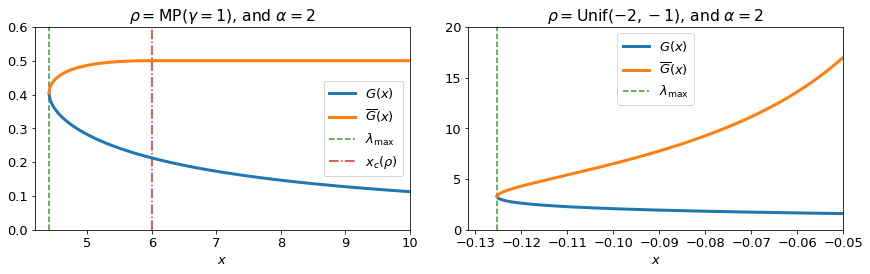

In [6]:
plt.rcParams.update({'font.size': 13})
ymax = [0.6, 20]
xmax = [10, -0.05]
xmin = [0.95*lambdamax[0], 1.05*lambdamax[1]] 
fig, ax = plt.subplots(1,2,figsize=(12,4))
for (i_rho,rho) in enumerate(rho_list):
    ax[i_rho].set_xlim(xmin[i_rho], xmax[i_rho])
    ax[i_rho].set_ylim(0., ymax[i_rho])
    ax[i_rho].plot(x_values[i_rho],G_values[i_rho],linewidth=3, zorder = 1, label = r'$G(x)$')
    ax[i_rho].plot(x_values[i_rho],Gbar_values[i_rho],linewidth=3, zorder = 1, label = r'$\overline{G}(x)$')
    ax[i_rho].plot([lambdamax[i_rho],lambdamax[i_rho]],[0., ymax[i_rho]],linestyle='--',zorder=0, label = r'$\lambda_\mathrm{max}$')
    if xcrho[i_rho] < np.inf:
        ax[i_rho].plot([xcrho[i_rho],xcrho[i_rho]],[0., ymax[i_rho]],linestyle='-.',zorder=0, label = r'$x_c(\rho)$')
    ax[i_rho].set_xlabel(r'$x$')
    ax[i_rho].legend(fancybox=True)
    if rho == "mpastur":
        ax[i_rho].set_title(r'$\rho = \mathrm{MP}(\gamma = 1)$, and $\alpha = 2$')
    if rho == "uniform21":
        ax[i_rho].set_title(r'$\rho = \mathrm{Unif}(-2,-1)$, and $\alpha = 2$')
plt.tight_layout()

## Analytical rate functions $I(x)$

We compute them for five different distributions $\rho = \mathrm{MP}(\gamma = 1)$, and 10 values of $\alpha$.

In [7]:
rho_list = ["delta","doubledelta","semicircle","mpastur","uniform21"]
alpha_list = np.linspace(1,10,num=10)

In [9]:
lambdamax = np.zeros((len(rho_list),len(alpha_list)))
xvalues = [[[] for alpha in alpha_list] for rho in rho_list]
Ivalues = [[[] for alpha in alpha_list] for rho in rho_list]
for (i_rho,rho) in enumerate(rho_list):
        for (i_alpha,alpha) in enumerate(alpha_list):
            if not(alpha == 1 and rho == "uniform21"):
                filename = "Data/analytical/" + "nu_"+rho+"_alpha_"+str(alpha)
                infile = open(filename,'rb')
                results = pickle.load(infile)
                infile.close()
                lambdamax[i_rho][i_alpha] = results['lambdamax']
                xvalues[i_rho][i_alpha] = results['xvalues']
                Ivalues[i_rho][i_alpha] = results['Ivalues']

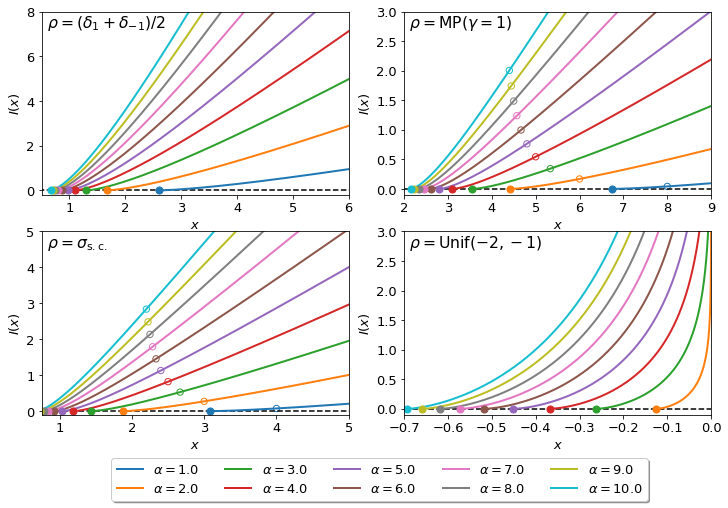

In [10]:
import matplotlib.colors as mcolors 

plt.rcParams.update({'font.size': 13})
fig, ax = plt.subplots(2,2,figsize=(12,8))
colors_list = list(mcolors.TABLEAU_COLORS)
xlims = [(0.5,6),(0.75,5),(2.0,9.),(-0.7,0)]
ylims = [(-0.2,8),(-0.1,5),(-0.1,3),(-0.1,3)]
dmax_list = [1.,1.,2.,4.,-1.]
Gmaxrho_list = [np.inf,np.inf,1.,0.5,np.inf]
rho_latex_list = [r'$\delta_0$',r'$(\delta_1+\delta_{-1})/2$',r'$\sigma_\mathrm{s.c.}$',r'$\mathrm{MP}(\gamma = 1)$',r'$\mathrm{Unif}(-2,-1)$']
for i_rho in range(1,5):
    rho = rho_list[i_rho]
    i1 = (i_rho-1) % 2
    i2 = (i_rho-1) // 2
    ax[i1][i2].set_xlabel(r'$x$')
    ax[i1][i2].set_xlim(xlims[i_rho-1])
    ax[i1][i2].set_ylim(ylims[i_rho-1])
    ax[i1][i2].set_ylabel(r'$I(x)$')
    ax[i1][i2].plot([-10,10],[0,0],linestyle='--',color='black',zorder=0)
    ax[i1][i2].set_title(r'$\,\, \rho = $'+rho_latex_list[i_rho],loc='left',y=0.88)
    for (i_alpha, alpha) in enumerate(alpha_list):
        if not(rho == "uniform21" and alpha == 1):
            ax[i1][i2].plot(xvalues[i_rho][i_alpha],Ivalues[i_rho][i_alpha],linewidth=2, color = colors_list[i_alpha], zorder = 1, label = r'$\alpha = $'+str(alpha))
            ax[i1][i2].scatter([lambdamax[i_rho][i_alpha]],[0.],color=colors_list[i_alpha],zorder=2,s=50)
            xcrho = dmax_list[i_rho]**2 * Gmaxrho_list[i_rho] + (1./alpha - 1)*dmax_list[i_rho]
            if xcrho > 0 and xcrho < np.inf:
                #Find the point in xvalues closest to xcrho 
                index = np.argmin(np.abs(xvalues[i_rho][i_alpha] - xcrho))
                ax[i1][i2].scatter([xcrho],[Ivalues[i_rho][i_alpha][index]],color=colors_list[i_alpha],zorder=0,marker='o',s=40, facecolors='none')
                
    # Shrink current axis's height by 10% on the bottom
    if i1 == 1:
        box = ax[i1][i2].get_position()
        ax[i1][i2].set_position([box.x0, box.y0 + box.height * 0.1,box.width, box.height * 0.9])

ax[1][0].legend(loc='upper center', bbox_to_anchor=(1.1, -0.2),ncol=5, fancybox=True, shadow=True)
plt.subplots_adjust(bottom=0.18,wspace=0.18)

## Plots of $x^\star(t)$ and comparison with Monte-Carlo simulations

We wish to compute $x^\star(t) \equiv \mathrm{argmin}_x (t x - I(x))$, for $t \in (0,\frac{\alpha}{2 d_\mathrm{max}})$ if $d_\mathrm{max} > 0$, and $t \in (0,+\infty)$ otherwise.

We first create an interpolated function objects for $I(x)$.
 
We will consider four possible $\rho$ and $\alpha = 2$, except for $\rho = \sigma_\mathrm{s.c.}$ for which $\alpha = 1$.

In [11]:
from scipy import interpolate
I_functions = [[None for alpha in alpha_list] for rho in rho_list]
for (i_rho,rho) in enumerate(rho_list):
        for (i_alpha,alpha) in enumerate(alpha_list):
            if not(rho == "uniform21" and alpha == 1): #We eliminate the rho = Unif(-2,-1) and alpha = 1 case
                I_functions[i_rho][i_alpha] = interpolate.interp1d(xvalues[i_rho][i_alpha], Ivalues[i_rho][i_alpha], kind='cubic', assume_sorted=True)

In [13]:
#Now we compute the Legendre transform and the function x*(t)
L_functions = [[None for alpha in alpha_list] for rho in rho_list]
xstar_functions = [[None for alpha in alpha_list] for rho in rho_list] #The functions giving the extrmizing xstar(t)
t_lists = [[[] for alpha in alpha_list] for rho in rho_list]
x_lists = [[[] for alpha in alpha_list] for rho in rho_list]
L_lists = [[[] for alpha in alpha_list] for rho in rho_list]
for (i_rho,rho) in enumerate(rho_list):
    dmax = dmax_list[i_rho]
    for (i_alpha,alpha) in enumerate(alpha_list):
        if not(rho == "uniform21" and alpha == 1): #We eliminate the rho = Unif(-2,-1) and alpha = 1 case
            if dmax > 0:
                max_t = alpha/(2*dmax) #There is a factor 2 since I(x) \sim_{x >> 1} alpha x / (2 dmax)
            else:
                max_t = 25.
            min_t = 0.
            grid_t = np.linspace(min_t,max_t,num=5000)
            for (i_t, t) in enumerate(grid_t):
                #We numerically solve the equation I'(x) = t as a function of x
                Iderivative = np.gradient(Ivalues[i_rho][i_alpha])
                xspacing = xvalues[i_rho][i_alpha][1]-xvalues[i_rho][i_alpha][0] #We use that xvalues are evenly spaced !
                Iderivative *= 1./xspacing #Now Iderivative really is the gradient
                xmin_arg = np.argmin(np.abs(Iderivative - t))
                if np.abs(Iderivative[xmin_arg] - t) <= 1e-4:
                    xmin = xvalues[i_rho][i_alpha][xmin_arg]
                    #The Legendre transform is now t*x - I(x)
                    x_lists[i_rho][i_alpha].append(xmin)
                    L_lists[i_rho][i_alpha].append(t*xmin - Ivalues[i_rho][i_alpha][xmin_arg])
                    t_lists[i_rho][i_alpha].append(t)
            #Now we create an interpolation object
            L_functions[i_rho][i_alpha] = interpolate.interp1d(t_lists[i_rho][i_alpha], L_lists[i_rho][i_alpha], kind='cubic', assume_sorted=True)
            xstar_functions[i_rho][i_alpha] = interpolate.interp1d(t_lists[i_rho][i_alpha], x_lists[i_rho][i_alpha], kind='cubic', assume_sorted=True)

In [16]:
#Loading the MC data
means_list = [None for rho in rho_list] #Aggregated mean and std
means_list_all = [None for rho in rho_list] #All means and stds
stds_list_all = [None for rho in rho_list] 
t_lists_mc = [None for rho in rho_list]
for (i_rho,rho) in enumerate(rho_list):
    n = 300
    alpha = 2.
    if rho == "mpastur" or rho == "semicircle":
        n = 500
    if rho == "doubledelta":
        t_lists_mc[i_rho] = np.linspace(0.7,0.,num = 9, endpoint = False)
    elif rho == "semicircle":
        alpha = 1.
        t_lists_mc[i_rho] = np.linspace(0.15,0.05,num = 10)
    elif rho == "mpastur":
        t_lists_mc[i_rho] = np.linspace(0.18,0.,num = 10)
        t_lists_mc[i_rho] = t_lists_mc[i_rho][:8]
    elif rho == "uniform21":
        t_lists_mc[i_rho] = t_list = np.linspace(15.0,0.,num = 10,endpoint = False)
    else:
        t_lists_mc[i_rho] = []
    means_list[i_rho] = [None for t in t_lists_mc[i_rho]]
    means_list_all[i_rho] = [None for t in t_lists_mc[i_rho]]
    stds_list_all[i_rho] = [None for t in t_lists_mc[i_rho]]
    for (i_t,t) in enumerate(t_lists_mc[i_rho]):
        if rho == "semicircle" and t == 0.05:
            n = 300
        filename = "Data/MonteCarlo/" + "n_"+str(n)+"_alpha_"+str(alpha)+"_nu_"+rho+"_t_"+str(t)+".pkl"
        infile = open(filename,'rb')
        results = pickle.load(infile)
        infile.close()
        means_list[i_rho][i_t] = np.mean(results['measurements']) #I aggregate all the measurements
        means_list_all[i_rho][i_t] = results['means']
        stds_list_all[i_rho][i_t] = results['stds']
        
        #For some points we have additional measurements
        if (rho == "mpastur" and (i_t in [0,1])) or (rho == "semicircle" and i_t in [0,1,2]):
            filename = "Data/MonteCarlo/" + "n_"+str(n)+"_alpha_"+str(alpha)+"_nu_"+rho+"_t_"+str(t)+"_additional_points.pkl"
            infile = open(filename,'rb')
            results = pickle.load(infile)
            infile.close()
            #Same number of measurements as before
            means_list[i_rho][i_t] = (means_list[i_rho][i_t]+np.mean(results['measurements']))/2 #I aggregate all the measurements

            means_list_all[i_rho][i_t] = np.concatenate((means_list_all[i_rho][i_t],results['means']))
            stds_list_all[i_rho][i_t] = np.concatenate((stds_list_all[i_rho][i_t],results['stds']))

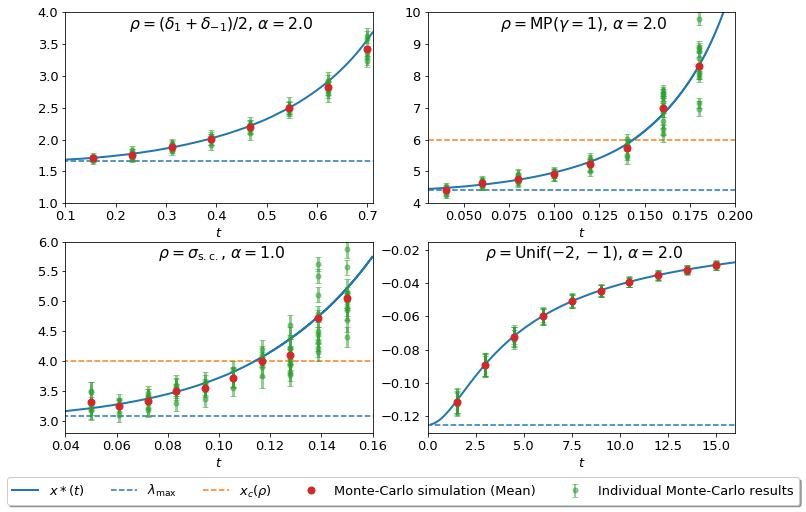

In [18]:
import matplotlib.colors as mcolors 

plt.rcParams.update({'font.size': 13})
fig, ax = plt.subplots(2,2,figsize=(12,8))
colors_list = list(mcolors.TABLEAU_COLORS)
xlims = [(0.1,0.71),(0.04,0.16),(0.03,0.20),(0.,16.)]
ylims = [(1.,4),(2.8,6.),(4,10),(-0.13,-0.015)]
dmax_list = [1.,1.,2.,4.,-1.]
Gmaxrho_list = [np.inf,np.inf,1.,0.5,np.inf]
rho_latex_list = [r'$\delta_0$',r'$(\delta_1+\delta_{-1})/2$',r'$\sigma_\mathrm{s.c.}$',r'$\mathrm{MP}(\gamma = 1)$',r'$\mathrm{Unif}(-2,-1)$']
for i_rho in range(1,5):
    rho = rho_list[i_rho]
    i1 = (i_rho-1) % 2
    i2 = (i_rho-1) // 2
    ax[i1][i2].set_xlabel(r'$t$')
    ax[i1][i2].set_xlim(xlims[i_rho-1])
    ax[i1][i2].set_ylim(ylims[i_rho-1])
    i_alpha = 1
    if rho == "semicircle":
        i_alpha = 0
    alpha = alpha_list[i_alpha]
    assert (alpha == 2. or (alpha == 1 and rho == "semicircle")), "ERROR : wrong alpha"
    ax[i1][i2].set_title(r'$\,\, \rho = $'+rho_latex_list[i_rho]+r', $\alpha = $'+str(alpha),loc='center',y=0.88)
    b = ax[i1][i2].plot(t_lists[i_rho][i_alpha],x_lists[i_rho][i_alpha],linewidth=2, zorder = 1, label = r'$x*(t)$', color = colors_list[0])
    xcrho = dmax_list[i_rho]**2 * Gmaxrho_list[i_rho] + (1./alpha - 1)*dmax_list[i_rho]
    ax[i1][i2].plot([-10,100],[lambdamax[i_rho][i_alpha],lambdamax[i_rho][i_alpha]],linestyle='--',color=b[-1].get_color(), zorder = 0, label = r'$\lambda_\mathrm{max}$')
    if xcrho > 0 and xcrho < np.inf:
        ax[i1][i2].plot([-10,10],[xcrho,xcrho],linestyle='--', zorder = 0, label = r'$x_c(\rho)$', color = colors_list[1])

    # Shrink current axis's height by 10% on the bottom
    if i1 == 1:
        box = ax[i1][i2].get_position()
        ax[i1][i2].set_position([box.x0, box.y0 + box.height * 0.1,box.width, box.height * 0.9])
    
    ax[i1][i2].plot(t_lists_mc[i_rho], means_list[i_rho], 'o', label = r'Monte-Carlo simulation (Mean)', markersize=7, color = colors_list[3],zorder = 3)
    for (i_t,t) in enumerate(t_lists_mc[i_rho]):
        for i in range(len(means_list_all[i_rho][i_t])):
            if i == i_t == 0:
                b=ax[i1][i2].errorbar([t], [means_list_all[i_rho][i_t][i]], yerr = [stds_list_all[i_rho][i_t][i]], alpha = 0.5, label = r'Individual Monte-Carlo results', markersize=5, fmt = 'o', capsize=3, elinewidth=2, color = colors_list[2],zorder=2)
            else:
                b=ax[i1][i2].errorbar([t], [means_list_all[i_rho][i_t][i]], yerr = [stds_list_all[i_rho][i_t][i]], alpha = 0.5, fmt = 'o', markersize=5, capsize=3, elinewidth=3, color = colors_list[2],zorder=2)
            #b[-1][0].set_linestyle('--')
    
ax[1][0].legend(loc='upper center', bbox_to_anchor=(1.1, -0.2),ncol=5, fancybox=True, shadow=True)
plt.subplots_adjust(bottom=0.15,wspace=0.18)